In [1]:
import gym
import neat
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CartPole-v1')


def eval_genomes(genomes, config):
    max_fitness = 0
    for _, genome in genomes:
        genome.fitness = 0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        observation = env.reset()[0]
        terminated, truncated = False, False

        while not terminated and not truncated:
            neural_network_output = net.activate(observation)
            action = np.argmax(neural_network_output)
            observation, reward, terminated, truncated, _ = env.step(action)
            genome.fitness += reward
            if genome.fitness > max_fitness:
                max_fitness = genome.fitness

config_path = 'config-feedforward-cart-pole'  # Update with your NEAT configuration file path
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

population = neat.Population(config)
population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

winner = population.run(eval_genomes, 15)



 ****** Running generation 0 ****** 

Population's average fitness: 27.74000 stdev: 72.56247
Best fitness: 500.00000 - size: (3, 7) - species 2 - id 13
Average adjusted fitness: 0.054
Mean genetic distance 2.430, standard deviation 0.641
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    28     20.2    0.025     0
     2    0    22     49.2    0.084     0
Total extinctions: 0
Generation time: 0.057 sec

 ****** Running generation 1 ****** 

Population's average fitness: 47.76000 stdev: 99.21261
Best fitness: 500.00000 - size: (3, 7) - species 2 - id 13
Average adjusted fitness: 0.085
Mean genetic distance 2.134, standard deviation 0.833
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    22     34.0    0.053     0
     2    1    28     65.2    0.116     0
Total extinctions: 0
Generation time: 0.090 sec (0.074 avera

C:\Users\Mazi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Population's average fitness: 85.12000 stdev: 136.96213
Best fitness: 500.00000 - size: (3, 7) - species 2 - id 13
Average adjusted fitness: 0.152
Mean genetic distance 1.838, standard deviation 0.653
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    20     61.9    0.109     0
     2    2    30    103.4    0.194     0
Total extinctions: 0
Generation time: 0.158 sec (0.102 average)

 ****** Running generation 3 ****** 

Population's average fitness: 84.22000 stdev: 128.13326
Best fitness: 500.00000 - size: (3, 7) - species 2 - id 13
Average adjusted fitness: 0.160
Mean genetic distance 1.811, standard deviation 0.739
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    25     99.7    0.186     0
     2    3    25     73.9    0.134     1
Total extinctions: 0
Generation time: 0.163 sec (0.117 average)

 ****** Running 

In [2]:
env = gym.make('CartPole-v1', render_mode="human")
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
terminated, truncated = False, False
observation =  env.reset()[0]
while not terminated and not truncated:
    neural_network_output = winner_net.activate(observation)
    action = np.argmax(neural_network_output)
    observation, reward, terminated, truncated, info = env.step(action)
env.close()

C:\Users\Mazi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [12]:
import visualize

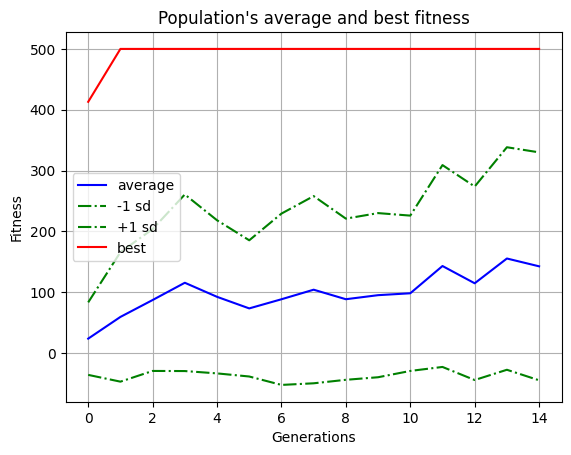

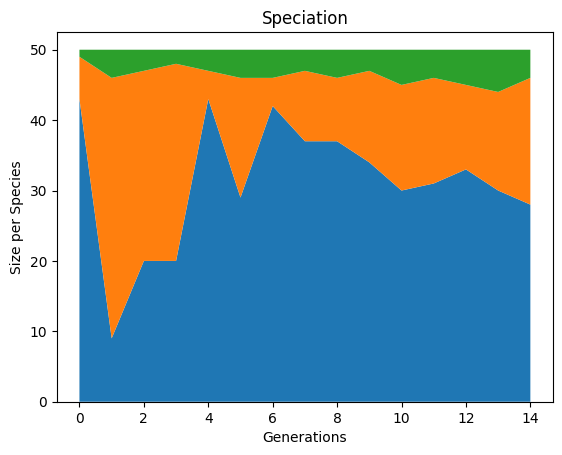

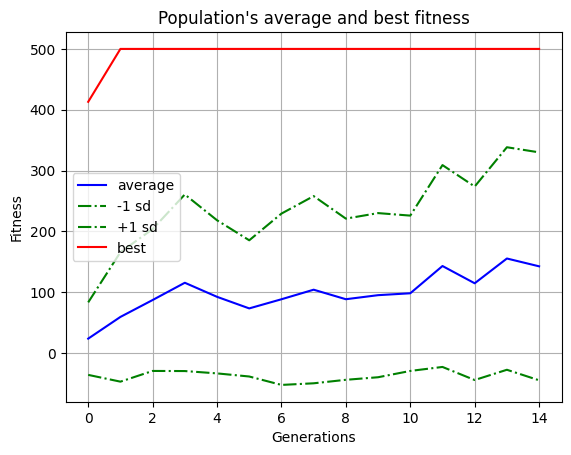

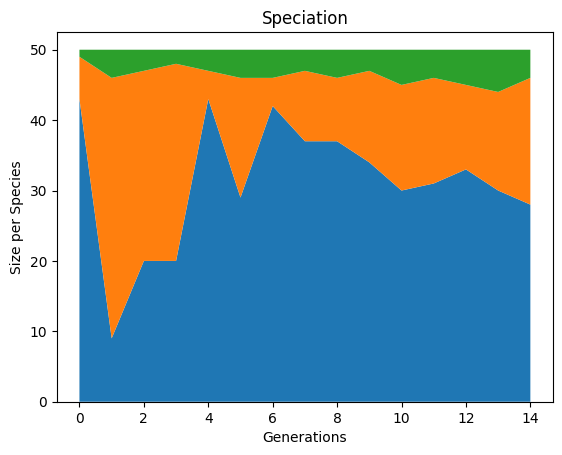

In [13]:
# Render the best network
node_names = {-1:"x1", -2: "x2", -3: "x3", -4: "x4", 0:"setosa", 1:"virginica", 2:"versicolor"}
visualize.draw_net(
    config,
    genome=winner,
    node_names=node_names,
    show_disabled=True,
    prune_unused=False
) 

# Plot the statistics
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)